# Quantum - Noise in Quantum Computers

In [1]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
backend = Aer.get_backend('qasm_simulator')

def get_noise(p_meas, p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements 
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x", "id"]) # single qubit gate error is applied to x gates 
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates 
    
    return noise_model


{'1': 9, '0': 1015}


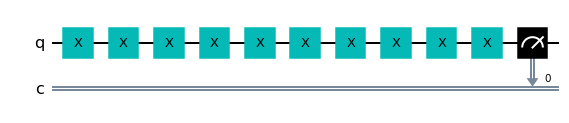

In [3]:
noise_model = get_noise(0.01, 0.05)
N = 5 

qc3 = QuantumCircuit(1,1)
for i in range(N):
    qc3.x(0)
    qc3.x(0)
    
qc3.measure(qc3.qregs[0], qc3.cregs[0])

counts = execute(qc3, backend, noise_model=noise_model).result().get_counts()

print(counts)
#plot_histogram(counts)
qc3.draw('mpl')


## Experiment #1 

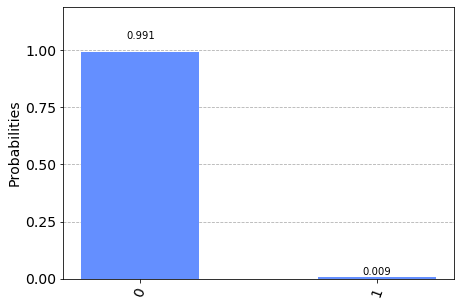

In [4]:
plot_histogram(counts)


{'1': 9, '0': 1015}


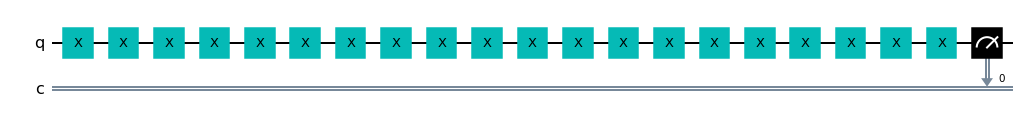

In [5]:
noise_model = get_noise(0.01, 0.05)
N = 10

qc3 = QuantumCircuit(1,1)
for i in range(N):
    qc3.x(0)
    qc3.x(0)
    
qc3.measure(qc3.qregs[0], qc3.cregs[0])

counts = execute(qc3, backend, noise_model=noise_model).result().get_counts()

print(counts)
#plot_histogram(counts)
qc3.draw('mpl')


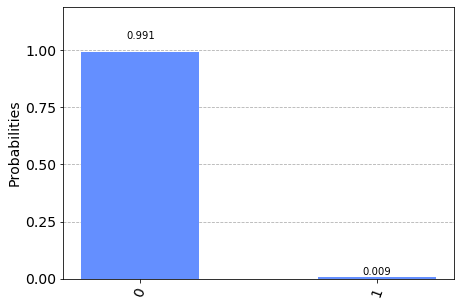

In [6]:
plot_histogram(counts)


{'10': 111, '00': 114, '11': 173, '01': 626}


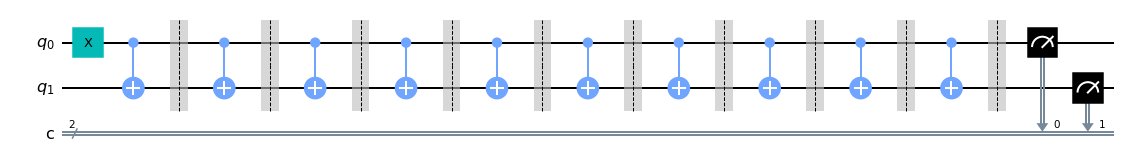

In [7]:
noise_model = get_noise(0.01, 0.05)
N = 5

qc4 = QuantumCircuit(2,2)
qc4.x(0)
for i in range(N):
    qc4.cx(0,1)
    qc4.barrier()
    qc4.cx(0,1)
    qc4.barrier()
    
qc4.measure(qc4.qregs[0], qc4.cregs[0])

counts = execute(qc4, backend, noise_model=noise_model).result().get_counts()

print(counts)
#plot_histogram(counts)
qc4.draw('mpl')


## Experiment #2

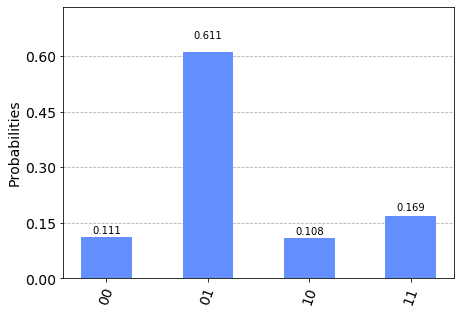

In [8]:
plot_histogram(counts)

{'11': 225, '01': 456, '10': 161, '00': 182}


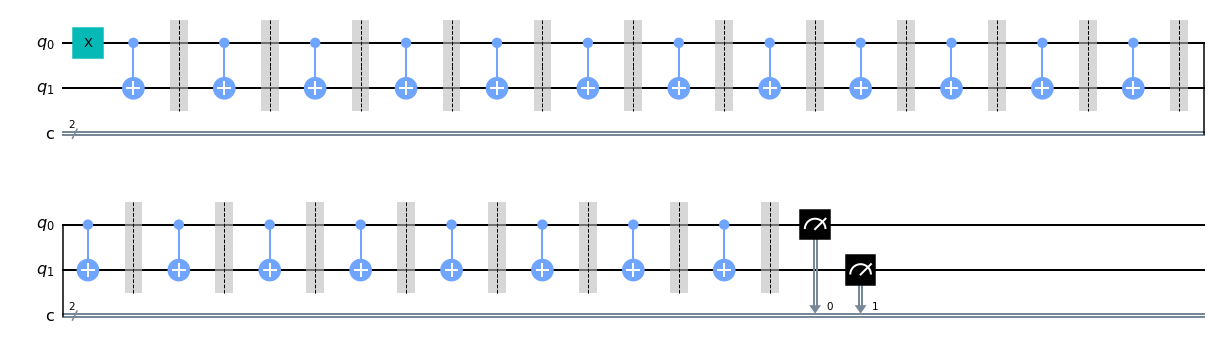

In [9]:
noise_model = get_noise(0.01, 0.05)
N = 10

qc4 = QuantumCircuit(2,2)
qc4.x(0)
for i in range(N):
    qc4.cx(0,1)
    qc4.barrier()
    qc4.cx(0,1)
    qc4.barrier()
    
qc4.measure(qc4.qregs[0], qc4.cregs[0])

counts = execute(qc4, backend, noise_model=noise_model).result().get_counts()

print(counts)
#plot_histogram(counts)
qc4.draw('mpl')


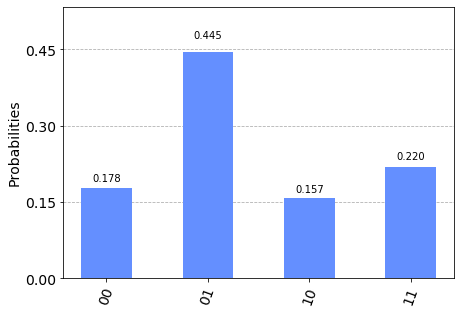

In [10]:
plot_histogram(counts)

{'001': 10, '100': 5, '000': 998, '010': 11}


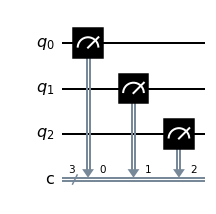

In [11]:
noise_model = get_noise(0.01, 0.01)

qc0 = QuantumCircuit(3,3, name='0') # initialize the circuit with three qubits in the 0 state 

qc0.measure(qc0.qregs[0], qc0.cregs[0]) # measure the qubits

counts = execute(qc0, backend, noise_model=noise_model).result().get_counts()

print(counts)
qc0.draw('mpl')



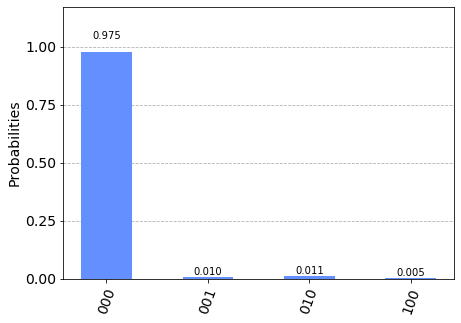

In [12]:
plot_histogram(counts)

{'110': 10, '011': 11, '111': 992, '101': 11}


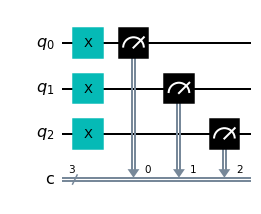

In [13]:
noise_model = get_noise(0.01, 0.01)

qc1 = QuantumCircuit(3,3, name='0') # initialize the circuit with three qubits in the 0 state 
qc1.x(qc1.qregs[0])
qc1.measure(qc1.qregs[0], qc1.cregs[0]) # measure the qubits

counts = execute(qc1, backend, noise_model=noise_model).result().get_counts()

print(counts)
qc1.draw('mpl')



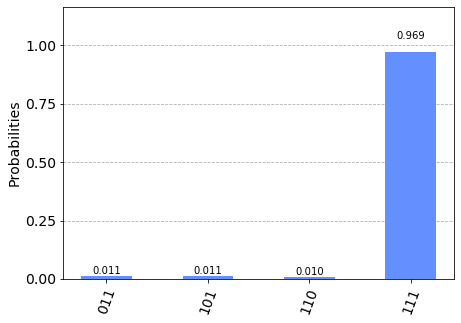

In [14]:
plot_histogram(counts)

{'010': 1, '110': 12, '101': 14, '111': 981, '011': 16}


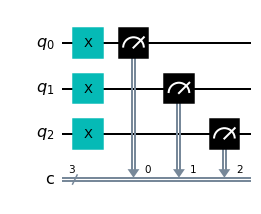

In [15]:
noise_model = get_noise(0.01, 0.01)

qc1 = QuantumCircuit(3,3, name='0') # initialize the circuit with three qubits in the 0 state 
qc1.x(qc1.qregs[0])
qc1.measure(qc1.qregs[0], qc1.cregs[0]) # measure the qubits

counts = execute(qc1, backend, noise_model=noise_model).result().get_counts()

print(counts)
qc1.draw('mpl')



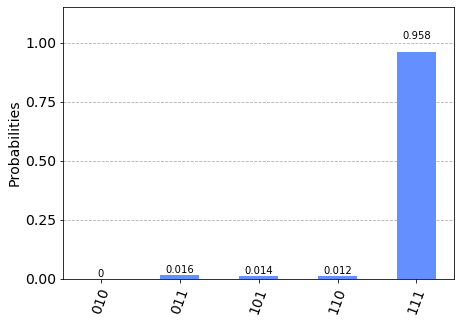

In [16]:
plot_histogram(counts)

## Experiment #3

{'10011': 2, '11011': 16, '11111': 949, '01111': 12, '10110': 1, '11110': 14, '11101': 14, '10111': 16}


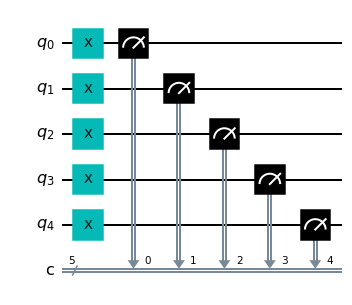

In [17]:
noise_model = get_noise(0.01, 0.01)

qc1 = QuantumCircuit(5,5, name='0') # initialize the circuit with three qubits in the 0 state 
qc1.x(qc1.qregs[0])

qc1.measure(qc1.qregs[0], qc1.cregs[0]) # measure the qubits

counts = execute(qc1, backend, noise_model=noise_model).result().get_counts()

print(counts)
qc1.draw('mpl')



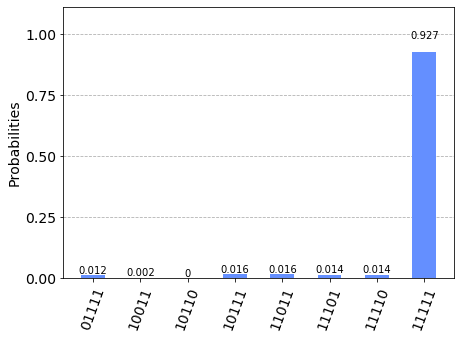

In [18]:
plot_histogram(counts)

###   How does this impact the probability of getting the correct answer
#### It impacts it by lowering the probablity. 

## Measureing Errors in a Circuit

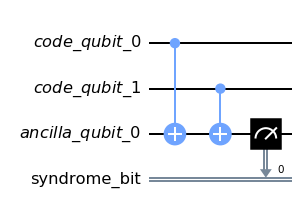

In [19]:
cq = QuantumRegister(2, 'code_qubit')
lq = QuantumRegister(1, 'ancilla_qubit')
sb = ClassicalRegister(1, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq,sb)
qc.draw('mpl')

In [20]:
qc_init = QuantumCircuit(3,1)
counts = execute( qc_init.compose(qc), backend).result().get_counts()
print("Results:",counts)

Results: {'0': 1024}


In [21]:
qc_init = QuantumCircuit(3,1)
qc_init.x(0)
qc_init.x(1)
counts = execute( qc_init.compose(qc), backend).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


In [22]:
qc_init = QuantumCircuit(3,1)
qc_init.h(0)
qc_init.cx(0,1)
counts = execute( qc_init.compose(qc), backend).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


In [23]:
qc_init = QuantumCircuit(3,1)
qc_init.x(0)
counts = execute( qc_init.compose(qc), backend).result().get_counts()
print('Results:',counts)

Results: {'1': 1024}
